<a href="https://colab.research.google.com/github/ricky-kiva/dl-tensorflow-intro/blob/main/3_l2_explore_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Convolutions**

In [9]:
# import libraries
from scipy.datasets import ascent
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# load Ascent image
ascent_image = ascent()

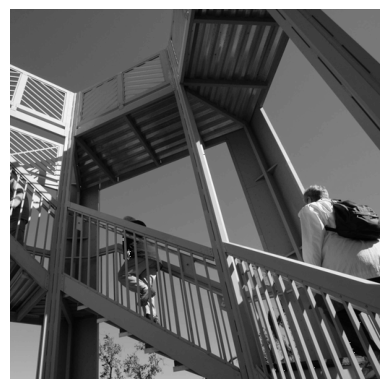

In [8]:
# visualize Ascent image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

we need to copy it so it's not get transformed too. the image is stored in numpy array

In [10]:
# copy image to numpy array
image_transformed = np.copy(ascent_image)

# get dimension of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

create filter as 3x3 array, to do convolution

In [11]:
# experiment with different
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] # edge detection filter

# other filters to try
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]] # vertical edge filter
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] # horizontal edge filter

# if all the digits in the filter don't add up to 0 or 1, do a weight
# example: if the filter are [ [1, 1, 1], [1, 2, 1], [1, 1, 1]] which add up to 10
# - set it's weight to .1 to normalize them

weight = 1

In [12]:
# iterate over the image to do convolution
for x in range(1, (size_x)-1):
  for y in range(1, (size_y)-1):
    convolution = 0.0
    convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
    convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
    convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
    convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
    convolution = convolution + (ascent_image[x, y] * filter[1][1])
    convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
    convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
    convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
    convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

    # multiply by weight
    convolution = convolution * weight

    # check boundaries of pixel values
    if(convolution < 0):
      convolution = 0
    if(convolution > 255):
      CONVOLUTION = 255

    # load into transformed image
    image_transformed[x, y] = convolution

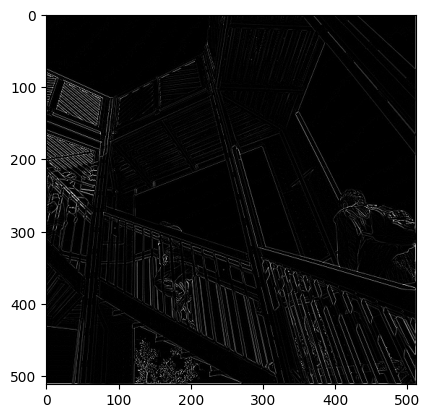

In [13]:
# see the convoluted image
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

# **Effects of Max Pooling**

will show the effect of (2,2) pooling

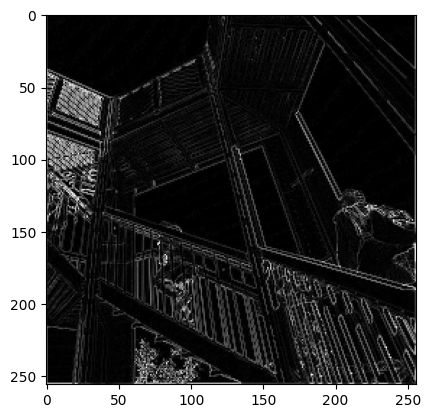

In [16]:
# assign dimension according to applied pooling
new_x = int(size_x/2)
new_y = int(size_y/2)

# create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# iterate over the image, to do max pooling
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):

    # store all pixel values in (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # get only the largest value & assign to reduced image
    newImage[int(x/2), int(y/2)] = max(pixels)

# plot the image. note the size of the axes (256 pixels, instead of 512)
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()